<a href="https://colab.research.google.com/github/superpanditas/Quinio/blob/main/Weekly_SKU_level_Product_Sales_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('/content/Productlevel_Sales_Transactions_Dataset_Weekly.csv')
# Print data
data.head()

,Scode,Pcode,Price,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,Unnamed: 107,94
0,Store1,SKU1,$24.00,23,48,47,42,22,29,47,...,33,40,125,133,229,381,21,31,NaN,NaN
1,Store1,SKU2,$63.00,23,22,25,40,32,26,30,...,25,50,75,95,231,590,25,33,NaN,NaN
2,Store1,SKU3,$93.00,7,11,8,9,10,8,7,...,13,30,67,188,267,330,35,33,NaN,NaN
3,Store1,SKU4,$48.00,50,31,50,33,26,27,42,...,26,23,92,126,205,357,30,34,NaN,NaN
4,Store1,SKU5,$62.00,8,5,13,11,6,7,9,...,15,21,93,243,710,1872,33,10,NaN,NaN


In [3]:
# info about DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 109 entries, Scode to 94
dtypes: float64(2), int64(104), object(3)
memory usage: 5.0+ MB


In [4]:
# dtypes of all columns
#print(data.dtypes)

# Function to remove non-numeric values and convert string to float
def convert_value(string_value):
  if isinstance(string_value, (int, float)):
    return string_value
  string_value = ''.join(s for s in string_value if s.isdigit() or s in ['.', ','])
  return float(string_value)

data['Price'] = data['Price'].apply(lambda x: convert_value(x))

In [5]:
# Eliminate columns "Unnamed: 107" and "94" because have null values in all rows
data = data.drop(['Unnamed: 107', '94'], axis=1)

# Change week columns by dates to manage more easily data
# Init dates by Mondays
start_date = '2022-01-03'

dates = pd.date_range(start=start_date, periods=104, freq='7D')
data.rename(columns=dict(zip(data.loc[:, ~data.columns.isin(['Scode', 'Pcode', 'Price'])].columns, dates)), inplace=True)

data.head()

,Scode,Pcode,Price,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,...,2023-10-23 00:00:00,2023-10-30 00:00:00,2023-11-06 00:00:00,2023-11-13 00:00:00,2023-11-20 00:00:00,2023-11-27 00:00:00,2023-12-04 00:00:00,2023-12-11 00:00:00,2023-12-18 00:00:00,2023-12-25 00:00:00
0,Store1,SKU1,24.0,23,48,47,42,22,29,47,...,31,37,33,40,125,133,229,381,21,31
1,Store1,SKU2,63.0,23,22,25,40,32,26,30,...,20,20,25,50,75,95,231,590,25,33
2,Store1,SKU3,93.0,7,11,8,9,10,8,7,...,9,17,13,30,67,188,267,330,35,33
3,Store1,SKU4,48.0,50,31,50,33,26,27,42,...,31,23,26,23,92,126,205,357,30,34
4,Store1,SKU5,62.0,8,5,13,11,6,7,9,...,19,9,15,21,93,243,710,1872,33,10


### Analyzing data from Store 1

In [6]:
# Store1
store1 = data.loc[data['Scode'] == 'Store1']
store1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Columns: 107 entries, Scode to 2023-12-25 00:00:00
dtypes: float64(1), int64(104), object(2)
memory usage: 843.8+ KB


In [7]:
store1['Price'].describe()

count    1000.000000
mean       55.919000
std        27.140985
min        10.000000
25%        32.000000
50%        56.000000
75%        80.000000
max       100.000000
Name: Price, dtype: float64

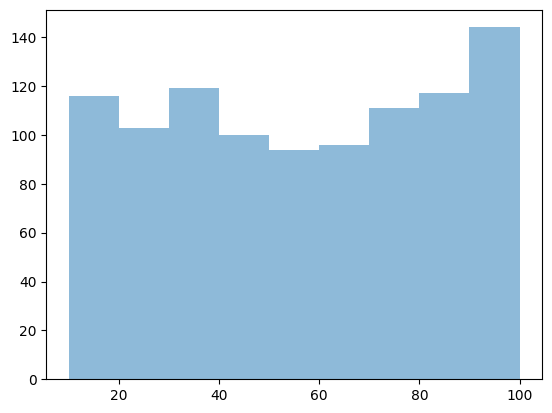

In [8]:
s1_price = store1['Price']
s1_price = s1_price.to_frame()
s1_price_sorted = s1_price.sort_values('Price')

plt.hist(s1_price_sorted, bins=np.arange(10,110,10), alpha=0.5)
plt.show()

In [9]:
store1_flt = store1.loc[:, ~data.columns.isin(['Scode', 'Price'])]
store1_flt.head()

,Pcode,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,2022-02-21 00:00:00,2022-02-28 00:00:00,...,2023-10-23 00:00:00,2023-10-30 00:00:00,2023-11-06 00:00:00,2023-11-13 00:00:00,2023-11-20 00:00:00,2023-11-27 00:00:00,2023-12-04 00:00:00,2023-12-11 00:00:00,2023-12-18 00:00:00,2023-12-25 00:00:00
0,SKU1,23,48,47,42,22,29,47,23,26,...,31,37,33,40,125,133,229,381,21,31
1,SKU2,23,22,25,40,32,26,30,50,29,...,20,20,25,50,75,95,231,590,25,33
2,SKU3,7,11,8,9,10,8,7,13,12,...,9,17,13,30,67,188,267,330,35,33
3,SKU4,50,31,50,33,26,27,42,43,24,...,31,23,26,23,92,126,205,357,30,34
4,SKU5,8,5,13,11,6,7,9,14,9,...,19,9,15,21,93,243,710,1872,33,10


In [52]:
store1_melted = pd.melt(store1_flt, id_vars=["Pcode"], var_name="dates", value_name="venta")
# df_melted.head(15)
store1_pivoted = store1_melted.pivot(index="dates", columns="Pcode", values="venta")
store1_pivoted.head()

Pcode,SKU1,SKU10,SKU100,SKU1000,SKU1001,SKU1002,SKU1003,SKU1004,SKU1005,SKU1006,...,SKU990,SKU991,SKU992,SKU993,SKU994,SKU995,SKU996,SKU997,SKU998,SKU999
dates,,,,,,,,,,,,,,,,,,,,,
2022-01-03,23,22,13,53,60,58,52,53,57,60,...,56,56,55,58,52,57,55,58,57,53
2022-01-10,48,19,6,57,52,50,52,60,58,54,...,53,52,59,58,53,56,59,53,54,53
2022-01-17,47,19,7,54,55,53,54,58,55,51,...,50,56,60,52,54,51,51,50,50,56
2022-01-24,42,29,9,52,55,50,57,58,57,56,...,58,55,57,56,53,60,50,50,50,60
2022-01-31,22,20,9,53,51,52,59,57,50,59,...,53,60,60,60,55,58,50,57,54,57


In [100]:
s1_data = store1_pivoted.reset_index()
s1_data.head()

Pcode,dates,SKU1,SKU10,SKU100,SKU1000,SKU1001,SKU1002,SKU1003,SKU1004,SKU1005,...,SKU990,SKU991,SKU992,SKU993,SKU994,SKU995,SKU996,SKU997,SKU998,SKU999
0,2022-01-03,23,22,13,53,60,58,52,53,57,...,56,56,55,58,52,57,55,58,57,53
1,2022-01-10,48,19,6,57,52,50,52,60,58,...,53,52,59,58,53,56,59,53,54,53
2,2022-01-17,47,19,7,54,55,53,54,58,55,...,50,56,60,52,54,51,51,50,50,56
3,2022-01-24,42,29,9,52,55,50,57,58,57,...,58,55,57,56,53,60,50,50,50,60
4,2022-01-31,22,20,9,53,51,52,59,57,50,...,53,60,60,60,55,58,50,57,54,57


In [13]:
store1_pivoted.describe().round(2)

Pcode,SKU1,SKU10,SKU100,SKU1000,SKU1001,SKU1002,SKU1003,SKU1004,SKU1005,SKU1006,...,SKU990,SKU991,SKU992,SKU993,SKU994,SKU995,SKU996,SKU997,SKU998,SKU999
count,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.00,...,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.00
mean,46.05,32.28,31.59,98.22,82.54,77.87,89.87,65.26,82.20,83.28,...,71.11,89.95,97.20,71.02,69.11,91.89,89.54,78.59,77.80,102.66
std,54.54,62.78,75.21,191.86,122.59,109.76,166.28,42.65,121.56,132.47,...,79.81,154.77,221.16,80.30,67.85,245.90,158.29,116.94,123.74,212.30
min,20.00,1.00,1.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
25%,25.75,14.75,8.00,53.00,53.00,52.00,53.00,53.00,53.00,52.00,...,52.00,52.00,52.75,53.00,53.00,52.00,51.00,51.75,52.00,53.00
50%,33.00,20.00,12.50,56.00,56.00,55.00,57.00,56.00,55.00,55.00,...,56.00,55.50,55.00,56.00,55.00,55.00,55.00,54.00,55.00,56.00
75%,44.00,25.00,27.25,59.00,59.00,58.00,59.00,59.00,58.00,58.25,...,58.25,59.00,59.00,58.00,57.00,58.00,59.00,58.00,58.00,59.00
max,381.00,503.00,567.00,1364.00,866.00,888.00,1502.00,356.00,870.00,1138.00,...,646.00,1003.00,1933.00,663.00,528.00,2404.00,1288.00,1034.00,1203.00,1517.00


<ipython-input-104-3b1b6ca3e416>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s1_data['Total'] = s1_data.sum(axis=1)


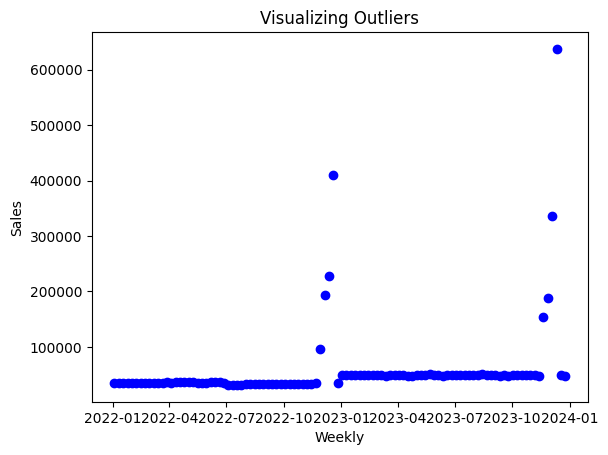

In [104]:
s1_data['Total'] = s1_data.sum(axis=1)

fig, ax = plt.subplots()
ax.scatter(s1_data['dates'], s1_data['Total'], color='blue')
ax.set_xlabel('Weekly')
ax.set_ylabel('Sales')
ax.set_title('Visualizing Outliers')
plt.show()

In [105]:
s1_data_sorted = s1_data.sort_values('Total', ascending=False)
s1_data_sorted.head(10)

Pcode,dates,SKU1,SKU10,SKU100,SKU1000,SKU1001,SKU1002,SKU1003,SKU1004,SKU1005,...,SKU991,SKU992,SKU993,SKU994,SKU995,SKU996,SKU997,SKU998,SKU999,Total
101,2023-12-11,381,503,567,1364,797,888,1502,187,870,...,1003,806,528,528,184,1288,1034,275,1137,637328.855769
50,2022-12-19,358,282,423,1223,866,698,572,356,594,...,918,1933,663,467,2404,815,517,1203,1517,410809.855769
100,2023-12-04,229,226,237,688,282,351,549,134,633,...,424,344,177,200,135,551,449,197,877,336306.855769
49,2022-12-12,179,258,240,536,539,240,538,283,558,...,863,1024,313,308,905,508,340,424,897,227128.855769
48,2022-12-05,136,97,80,480,377,155,317,212,222,...,409,356,110,138,364,350,173,349,307,193468.000000
99,2023-11-27,133,107,162,335,169,262,294,103,218,...,213,173,164,123,103,289,248,171,388,188032.855769
98,2023-11-20,125,41,56,113,74,162,120,71,93,...,81,70,69,65,64,105,126,82,140,153732.000000
47,2022-11-28,58,41,77,168,177,81,124,117,75,...,154,119,63,118,143,156,84,138,110,95528.000000
84,2023-08-14,22,26,28,59,55,58,51,58,54,...,60,59,53,57,50,60,59,50,57,50866.000000
72,2023-05-22,44,13,30,56,55,56,59,55,54,...,51,51,56,54,59,57,52,55,60,50270.000000


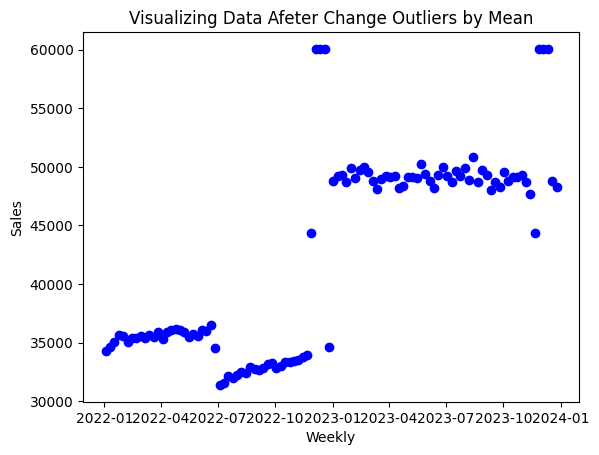

In [107]:
temp_s1_data = s1_data 
temp_s1_data['Total'] = temp_s1_data['Total'].mask((temp_s1_data['Total'] - temp_s1_data['Total'].mean()).abs() > 1.5 * temp_s1_data['Total'].std(), temp_s1_data['Total'].mean())

fig, ax = plt.subplots()

ax.scatter(temp_s1_data['dates'], temp_s1_data['Total'], color='blue')
ax.set_xlabel('Weekly')
ax.set_ylabel('Sales')
ax.set_title('Visualizing Data Afeter Change Outliers by Mean')
plt.show()

dates
2022-01-03    34318.000000
2022-01-10    34644.000000
2022-01-17    35094.000000
2022-01-24    35672.000000
2022-01-31    35562.000000
                  ...     
2023-11-27    60066.916143
2023-12-04    60066.916143
2023-12-11    60066.916143
2023-12-18    48780.000000
2023-12-25    48274.000000
Name: Total, Length: 104, dtype: float64


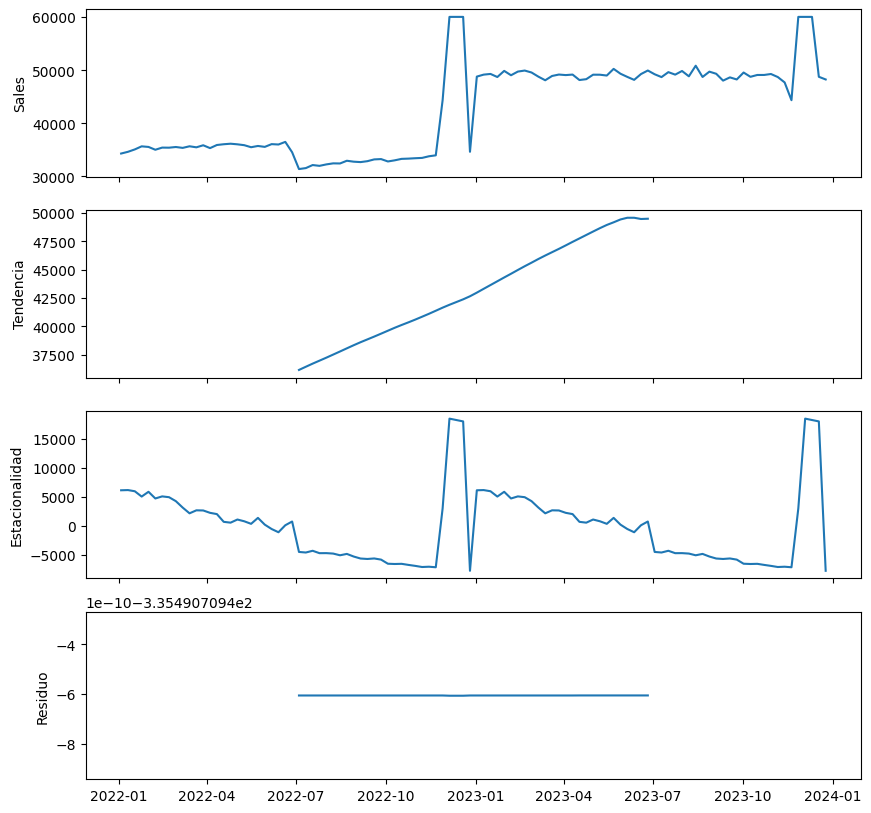

In [108]:
# Review of seasonality, cyclicality and trend of the general data of store 1 through a decomposition of the time series ... 

df_ts_s1 = temp_s1_data
df_ts_s1['dates'] = pd.to_datetime(df_ts_s1['dates'])
df_ts_s1.set_index('dates', inplace=True)

ts_s1 = df_ts_s1['Total']

print(ts_s1)

# Clasic Descomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts_s1, model='additive')

fig, ax = plt.subplots(nrows=4, figsize=(10,10), sharex=True)
ax[0].plot(ts_s1)
ax[0].set_ylabel('Sales')
ax[1].plot(decomp.trend)
ax[1].set_ylabel('Tendencia')
ax[2].plot(decomp.seasonal)
ax[2].set_ylabel('Estacionalidad')
ax[3].plot(decomp.resid)
ax[3].set_ylabel('Residuo')
plt.show()

In [110]:
'''
decomp_mul = seasonal_decompose(ts_s1, model='multiplicative')

fig, ax = plt.subplots(nrows=4, figsize=(10,10), sharex=True)
ax[0].plot(ts_s1)
ax[0].set_ylabel('Sales')
ax[1].plot(decomp_mul.trend)
ax[1].set_ylabel('Tendencia')
ax[2].plot(decomp_mul.seasonal)
ax[2].set_ylabel('Estacionalidad')
ax[3].plot(decomp_mul.resid)
ax[3].set_ylabel('Residuo')
plt.show()
'''

"\ndecomp_mul = seasonal_decompose(ts_s1, model='multiplicative')\n\nfig, ax = plt.subplots(nrows=4, figsize=(10,10), sharex=True)\nax[0].plot(ts_s1)\nax[0].set_ylabel('Sales')\nax[1].plot(decomp_mul.trend)\nax[1].set_ylabel('Tendencia')\nax[2].plot(decomp_mul.seasonal)\nax[2].set_ylabel('Estacionalidad')\nax[3].plot(decomp_mul.resid)\nax[3].set_ylabel('Residuo')\nplt.show()\n"

In [50]:
from scipy.stats import trim_meaimport numpy as np
import statsmodels.api as sm

# Searching the SKU with the best sales weekly but taking in cosideration outliers and for this process consider trimmed mean, mean and std by sku

# trimmed mean
trimmed_mean_1 = store1_pivoted.apply(lambda x: trim_mean(x, proportiontocut=0.15))
trimmed_mean_1 = trimmed_mean_1.reset_index(name='tm_w')
trimmed_mean_sorted_1 = trimmed_mean_1.sort_values('tm_w', ascending=False)
##trimmed_mean_sorted_1.head(20)

# mean
mean_1 = store1_pivoted.apply(lambda x: np.mean(x))
mean_1 = mean_1.reset_index(name='mean_w')
mean_sorted_1 = mean_1.sort_values('mean_w', ascending=False)
##mean_sorted_1.head(10)

# std 
std_1 = store1_pivoted.apply(lambda x: np.std(x))
std_1 = std_1.reset_index(name='std_w')
std_sorted_1 = std_1.sort_values('std_w', ascending=True)
##std_sorted_1.head(20)

In [53]:
# Join DataFrames
store1_central_value = trimmed_mean_1.merge(mean_1, on='Pcode').merge(std_1, on='Pcode')
store1_central_value['rank_std'] = store1_central_value['std_w'].rank(method='dense', ascending=False)
store1_central_value.sort_values('tm_w', ascending=False).head(40)

,Pcode,tm_w,mean_w,std_w,rank_std
974,SKU976,56.675676,84.663462,127.636474,182.0
910,SKU918,56.324324,86.125000,151.402081,102.0
946,SKU950,56.324324,108.586538,298.640304,4.0
896,SKU905,56.243243,78.134615,97.699210,323.0
959,SKU962,56.162162,80.230769,110.498193,252.0
914,SKU921,56.148649,80.913462,108.685601,265.0
863,SKU876,56.148649,98.019231,195.187532,43.0
6,SKU1003,56.135135,89.865385,165.478912,74.0
10,SKU1007,56.135135,104.798077,239.146896,18.0
836,SKU851,56.121622,81.375000,109.077089,263.0


### Optimización de Precio

In [203]:
SKU321 = data[data['Pcode'] == 'SKU321'] 
SKU321.head(15)

,Scode,Pcode,Price,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,...,2023-10-23 00:00:00,2023-10-30 00:00:00,2023-11-06 00:00:00,2023-11-13 00:00:00,2023-11-20 00:00:00,2023-11-27 00:00:00,2023-12-04 00:00:00,2023-12-11 00:00:00,2023-12-18 00:00:00,2023-12-25 00:00:00
320,Store1,SKU321,91.0,3,6,8,5,3,3,3,...,31,25,5,9,54,73,95,201,35,1
1320,Store2,SKU321,64.0,16,9,91,93,1,80,17,...,66,83,68,12,155,343,492,1216,29,24
2012,Store3,SKU321,41.0,97,78,88,56,87,57,66,...,73,73,100,56,228,402,880,1260,51,91
2093,Store3,SKU321,94.0,81,76,93,53,57,67,91,...,75,69,79,62,271,677,1752,1801,64,86
2212,Store3,SKU321,67.0,78,61,79,55,80,98,73,...,65,79,86,61,286,495,1391,1882,73,54
2280,Store3,SKU321,87.0,65,67,93,53,84,79,90,...,87,74,99,60,207,459,507,980,65,67
2562,Store3,SKU321,10.0,64,65,64,72,68,75,76,...,88,96,76,92,100,228,533,1480,70,61
2595,Store3,SKU321,30.0,56,54,50,54,62,76,73,...,65,79,85,80,198,520,1495,2770,58,86
2834,Store3,SKU321,43.0,87,60,60,92,54,68,78,...,65,64,73,53,253,265,793,1284,62,59
2883,Store3,SKU321,87.0,51,99,59,66,95,66,58,...,100,79,51,64,147,395,683,1717,63,57


In [197]:
SKU321_flt = SKU321.loc[:, ~SKU321.columns.isin(['Scode', 'Pcode'])]

'''
# Calculating mean sales weekly by each price
SKU321_melted = SKU321_flt.melt(id_vars=['Price'], var_name='Weekly', value_name='Sales')

SKU321_mean = SKU321_melted.groupby('Price')['Sales'].mean().reset_index()
print(SKU321_mean)

# Calculating mean sales weekly by each price but using percentiles to avoid outliers
p10, p90 = SKU321_melted['Sales'].quantile([0.10, 0.90])
SKU321_melted['Sales_Acot'] = SKU321_melted['Sales'].clip(p10,p90)
SKU321_mean_clip = SKU321_melted.groupby('Price')['Sales_Acot'].mean().reset_index()
print(SKU321_mean_clip)
'''

'''
store1_melted = pd.melt(store1_flt, id_vars=["Pcode"], var_name="dates", value_name="venta")
# df_melted.head(15)
store1_pivoted = store1_melted.pivot(index="dates", columns="Pcode", values="venta")
store1_pivoted.head()
'''

def media_sin_outliers(row):
    mean = np.mean(row[1:])
    std = np.std(row[1:])
    
    row = row[(row >= mean - 0.5*std) & (row <= mean + 0.5*std)]
    
    return np.mean(row)


SKU321_flt['mean_without_outliers'] = SKU321_flt.apply(media_sin_outliers, axis=1)
SKU321_adj = SKU321_flt[['Price', 'mean_without_outliers']]
SKU321_adj = SKU321_adj.sort_values('Price', ascending=True)
SKU321_adj.head(15)

<ipython-input-197-1d219af92736>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SKU321_flt['mean_without_outliers'] = SKU321_flt.apply(media_sin_outliers, axis=1)


,Price,mean_without_outliers
2562,10.0,74.350515
2595,30.0,78.262626
2012,41.0,77.520408
2834,43.0,72.298969
2997,44.0,38.020202
1320,64.0,52.864583
2212,67.0,79.969697
2280,87.0,75.319588
2883,87.0,75.333333
320,91.0,14.280000


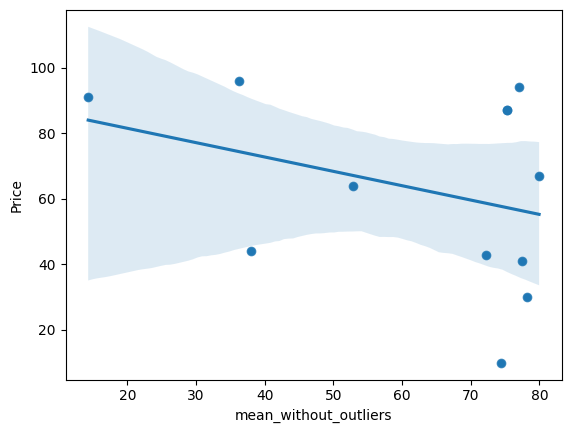

In [211]:
sns.scatterplot(data=SKU321_adj, x='mean_without_outliers', y='Price')
sns.regplot(data=SKU321_adj, x='mean_without_outliers', y='Price')
plt.show()

In [214]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(SKU321_adj['mean_without_outliers'], SKU321_adj['Price'])
print(f'Equation: y = {slope:.2f}x + {intercept:.2f}')

Equation: y = -0.44x + 90.21


### La curva de la demanda es la siguiente Q = P/(-0.44) + 205.02

Definimos las siguientes variables: I (Ingreso), P (Precio) & Q (Demanda)

Se busca maximizar los ingresos por lo que tenemos I = P*Q donde P = -0.44Q + 90.21. 
Sustituyendo tenemos I = (-0.44Q + 90.21)Q , la cual se busca encontrar el valor maximo global esto derivando la funcion I(Q) para obtener D(I(Q)) = -0.88Q + 90.21 e igualamos a 0 para obtener Q que maximiza como resultado Q = 102.3 maximiza las ganancias. La cual sustituimos en P(Q) para obtener nuestro precio optimo P = 45.19  

In [136]:
'''

stats = SKU321.describe().reset_index()



def get_list_of(metric, data, lista):
   df_temp = data[data['index'] == metric]
   for i in df_temp.iloc[0,1:]:
    lista.append(np.round(i,2))
   return lista

std_list = get_list_of('std', stats, [])

# std
print('The value min of std:', np.min(std_list))
print('The value mean of std:', np.mean(std_list))
print('The value max of std:', np.max(std_list))
'''

"\nstats = SKU321.describe().reset_index()\n\ndef get_list_of(metric, data, lista):\n   df_temp = data[data['index'] == metric]\n   for i in df_temp.iloc[0,1:]:\n    lista.append(np.round(i,2))\n   return lista\n\nstd_list = get_list_of('std', stats, [])\n\n# std\nprint('The value min of std:', np.min(std_list))\nprint('The value mean of std:', np.mean(std_list))\nprint('The value max of std:', np.max(std_list))\n"